<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
    Data Exploration 2
</div>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import OrderedDict
from collections import Counter

In [2]:
df = pd.read_csv('./data/NYPD_Arrest_Data__Year_to_Date_.csv')

In [3]:
for col in df.columns:
    print(f"Number of unique values in column {col}:  {len(df[col].unique())}")

Number of unique values in column ARREST_KEY:  112571
Number of unique values in column ARREST_DATE:  181
Number of unique values in column PD_CD:  244
Number of unique values in column PD_DESC:  233
Number of unique values in column KY_CD:  67
Number of unique values in column OFNS_DESC:  63
Number of unique values in column LAW_CODE:  923
Number of unique values in column LAW_CAT_CD:  6
Number of unique values in column ARREST_BORO:  5
Number of unique values in column ARREST_PRECINCT:  77
Number of unique values in column JURISDICTION_CODE:  22
Number of unique values in column AGE_GROUP:  5
Number of unique values in column PERP_SEX:  3
Number of unique values in column PERP_RACE:  7
Number of unique values in column X_COORD_CD:  22160
Number of unique values in column Y_COORD_CD:  23202
Number of unique values in column Latitude:  26457
Number of unique values in column Longitude:  26469
Number of unique values in column New Georeferenced Column:  26963


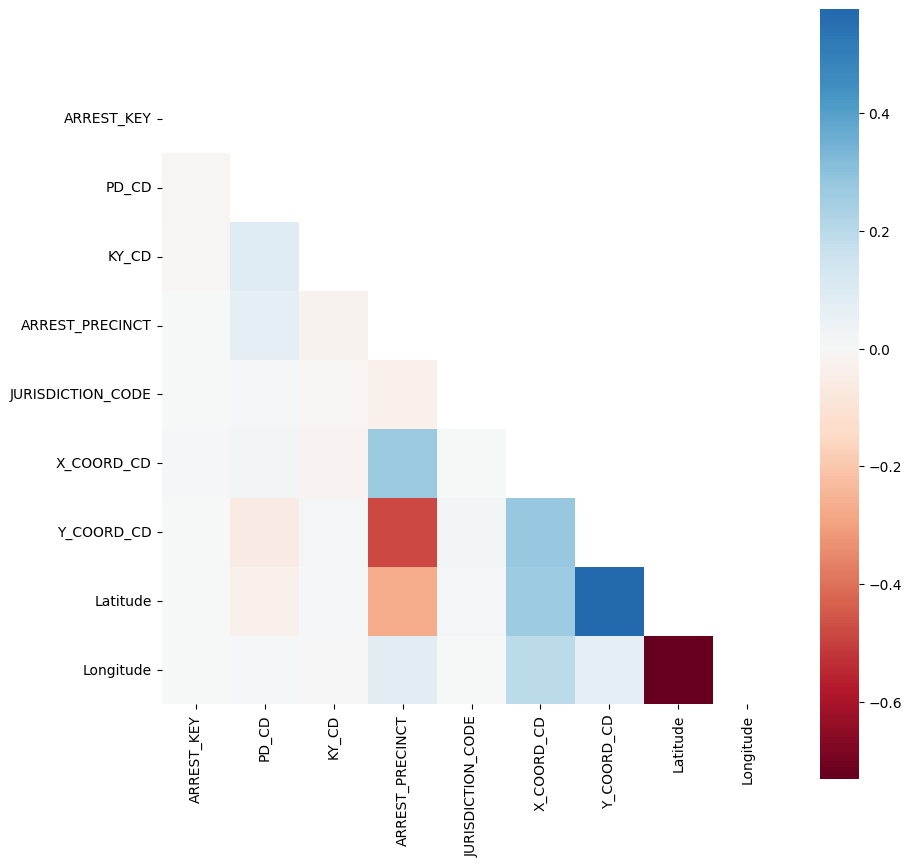

In [4]:
df_copy = df.select_dtypes('number')
corr = df_copy.corr()
matrix = np.triu(corr)
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corr, cmap='RdBu', center=0,ax=ax, square=True, mask=matrix)
plt.show()

# Ques 1: What sins do different races often commit?

## 1.1 Total arrests for each race

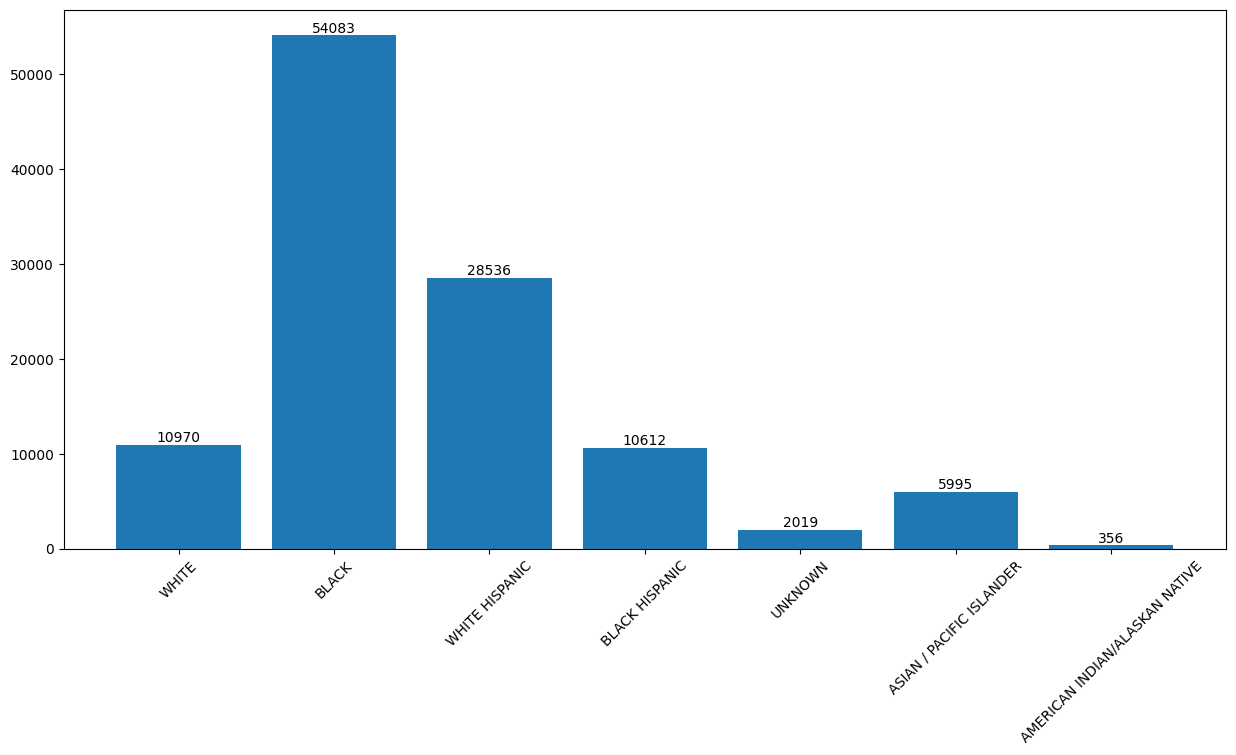

In [5]:
df_race = df.groupby('PERP_RACE')
race_dict = {}
for race in df['PERP_RACE'].unique():
    race_dict[race] = df_race.get_group(race)

plt.figure(figsize=(15, 7))
bar = plt.bar(race_dict.keys(), [len(race_dict[race]) for race in race_dict.keys()])
plt.bar_label(bar)
plt.xticks(rotation = 45)
plt.show()

## 1.2 Highest frequency 

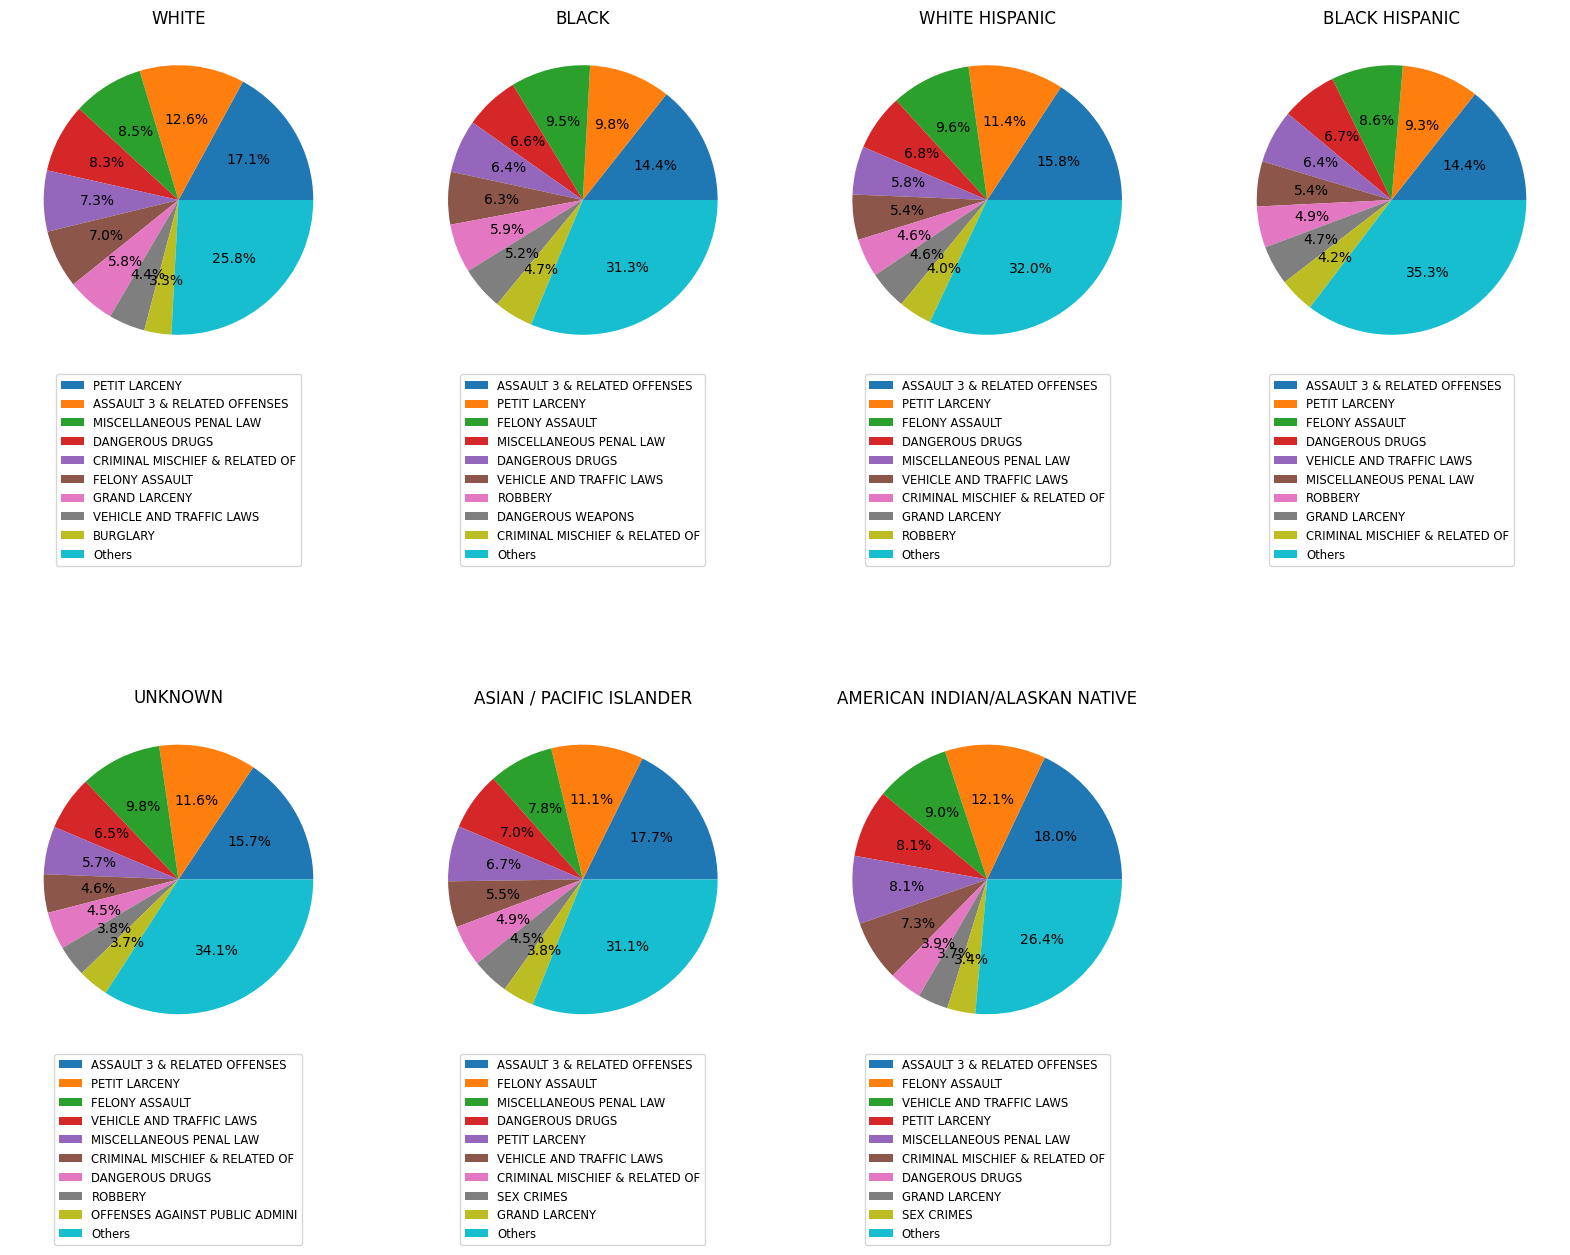

In [16]:
plt.figure(figsize=(20, 25))
for i, race in enumerate(race_dict.keys()):
    each_arrest_list = {}
    value_counts = race_dict[race]['OFNS_DESC'].value_counts()

    top = 9
    for tier in range(top):
        each_arrest_list[value_counts.keys()[tier]] = value_counts.iloc[tier]
    
    each_arrest_list['Others'] = sum(value_counts.iloc[top:]) 
    plt.subplot(3, 4, i + 1)
    plt.pie(each_arrest_list.values(), autopct='%1.1f%%') 

    plt.legend(each_arrest_list.keys(), loc='upper center', bbox_to_anchor=(0.5, 0), fontsize="small")
    plt.title(race)

# race_dict['BLACK']['OFNS_DESC'].value_counts()

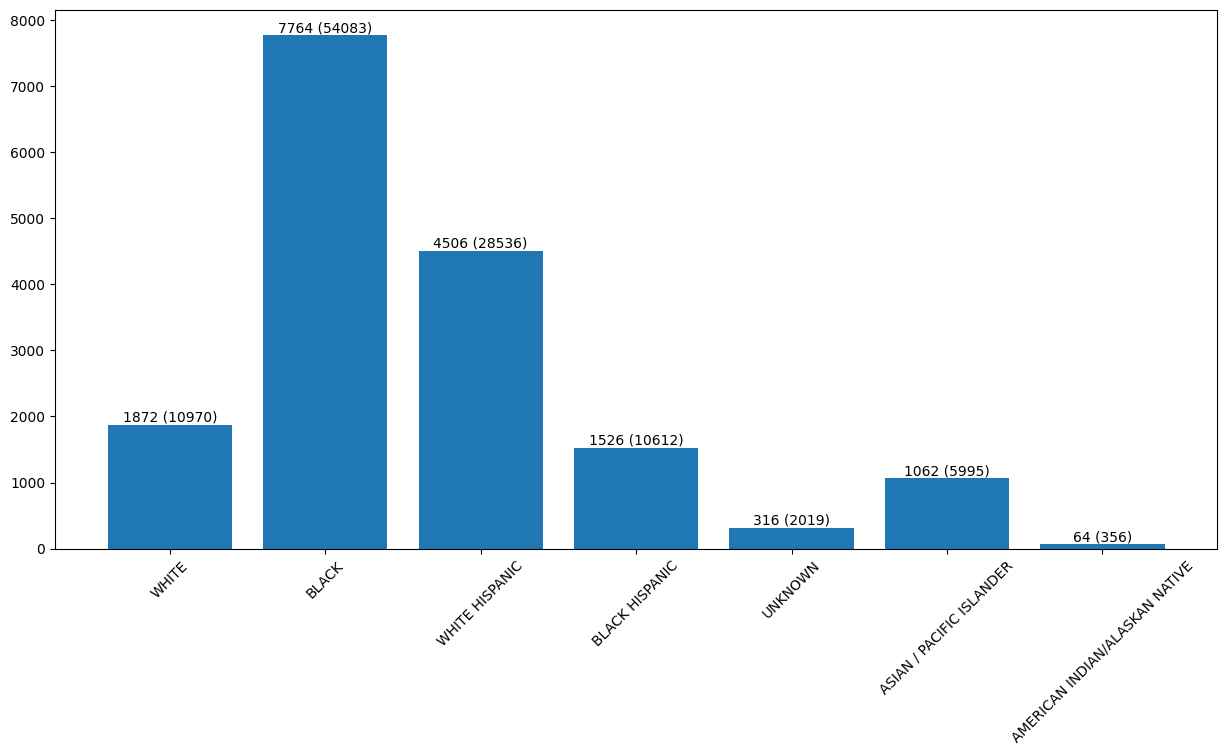

In [7]:
fig, ax = plt.subplots(figsize=(15, 7))
bar = ax.bar(race_dict.keys(), [race_dict[race]['OFNS_DESC'].value_counts().iloc[0] for race in race_dict.keys()])
x_labels = [str(round(race_dict[race]['OFNS_DESC'].value_counts().iloc[0])) + ' (' + 
            str(len(race_dict[race])) + ')' for race in race_dict.keys()]
x_labels
rects = ax.patches

for rect, label in zip(rects, x_labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.xticks(rotation = 45)
plt.show()

## Conclusion:
- Overall, almost races often commit "Assault 3 & related offenses", exception for White. 


# Ques 2: What sins do different age group often commit, and level of it? 

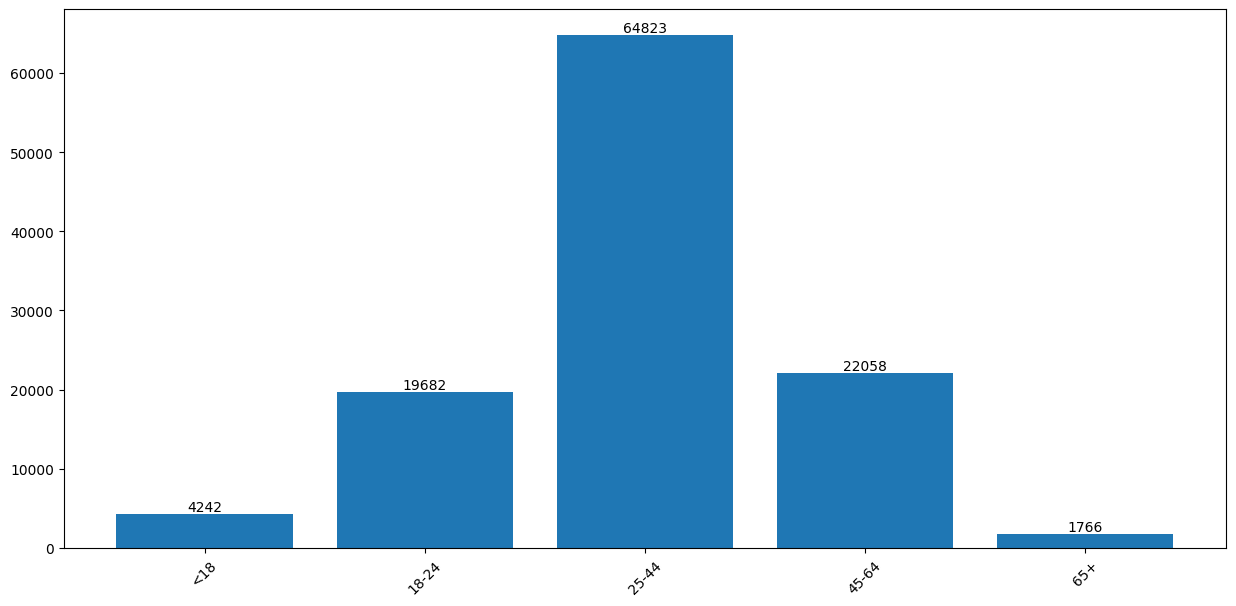

In [8]:
df_age = df.groupby('AGE_GROUP')
age_dict = {}
for race in df['AGE_GROUP'].unique():
    age_dict[race] = df_age.get_group(race)

age_key = list(age_dict.keys())
age_key.sort()
age_dict = {i: age_dict[i] for i in age_key}

key = list(age_dict.keys())[-1]

value = age_dict.pop(key)
age_dict = {key: value, **age_dict}

plt.figure(figsize=(15, 7))
bar = plt.bar(age_dict.keys(), [len(age_dict[race]) for race in age_dict.keys()])
plt.bar_label(bar)
plt.xticks(rotation = 45)
plt.show()

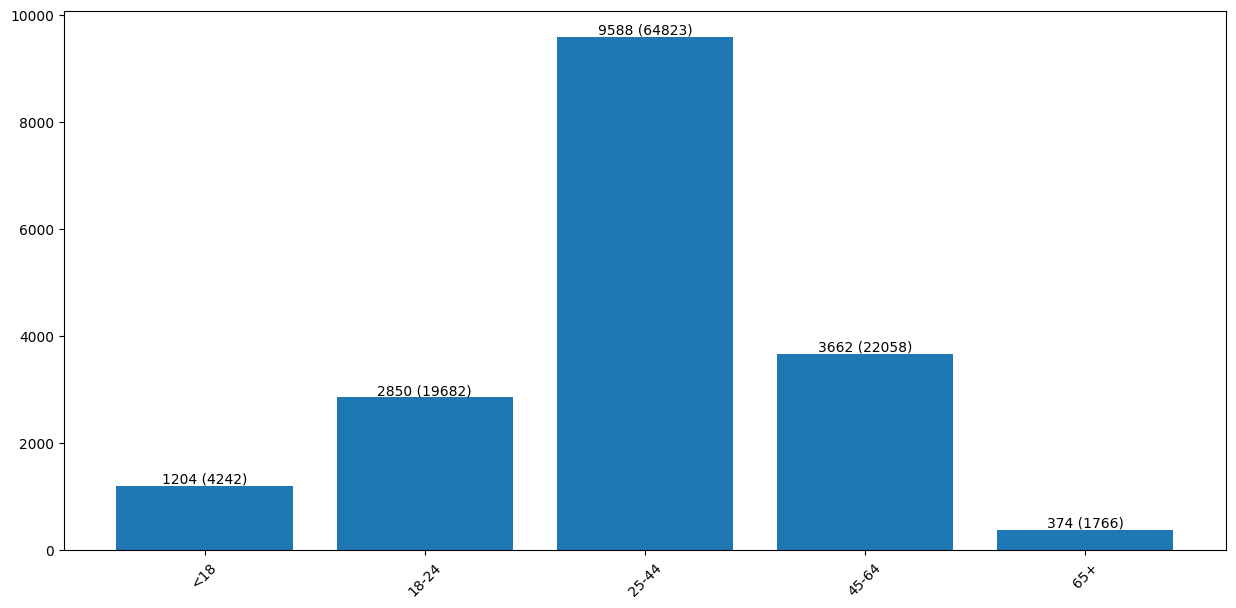

In [9]:
fig, ax = plt.subplots(figsize=(15, 7))
bar = ax.bar(age_dict.keys(), [age_dict[race]['OFNS_DESC'].value_counts().iloc[0] for race in age_dict.keys()])
x_labels = [str(round(age_dict[race]['OFNS_DESC'].value_counts().iloc[0])) + ' (' + 
            str(len(age_dict[race])) + ')' for race in age_dict.keys()]
x_labels
rects = ax.patches

for rect, label in zip(rects, x_labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.xticks(rotation = 45)
plt.show()

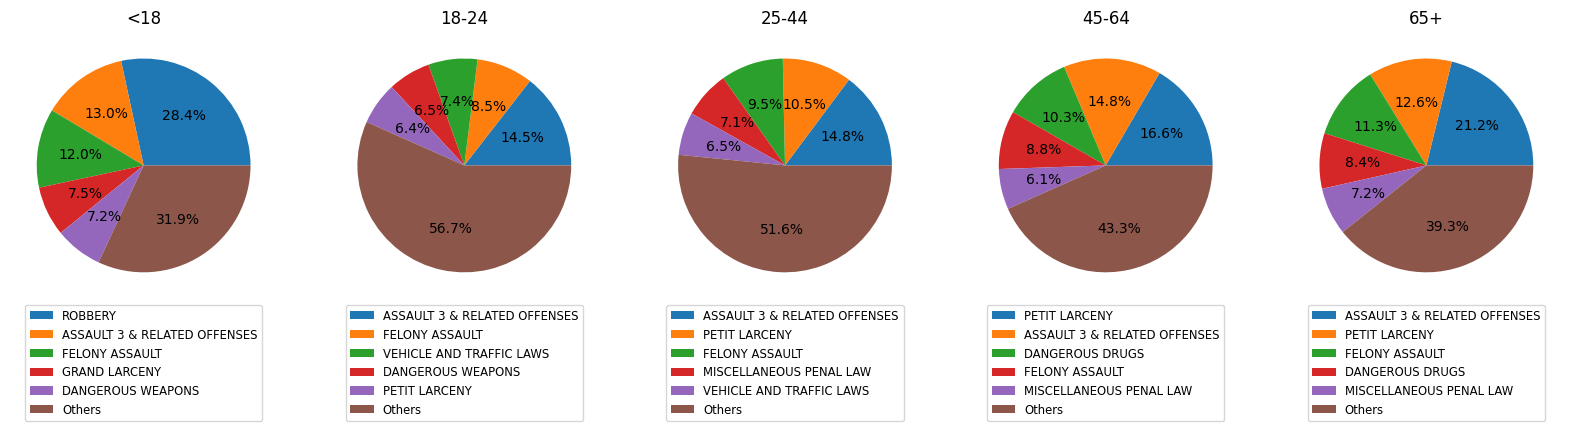

In [10]:
plt.figure(figsize=(20, 25))
for i, race in enumerate(age_dict.keys()):
    each_arrest_list = {}
    value_counts = age_dict[race]['OFNS_DESC'].value_counts()

    top = 5
    for tier in range(top):
        each_arrest_list[value_counts.keys()[tier]] = value_counts.iloc[tier]
    
    each_arrest_list['Others'] = sum(value_counts.iloc[top:]) 
    plt.subplot(1, 5, i + 1)
    plt.pie(each_arrest_list.values(), autopct='%1.1f%%') 

    plt.legend(each_arrest_list.keys(), loc='upper center', bbox_to_anchor=(0.5, 0), fontsize="small")
    plt.title(race)

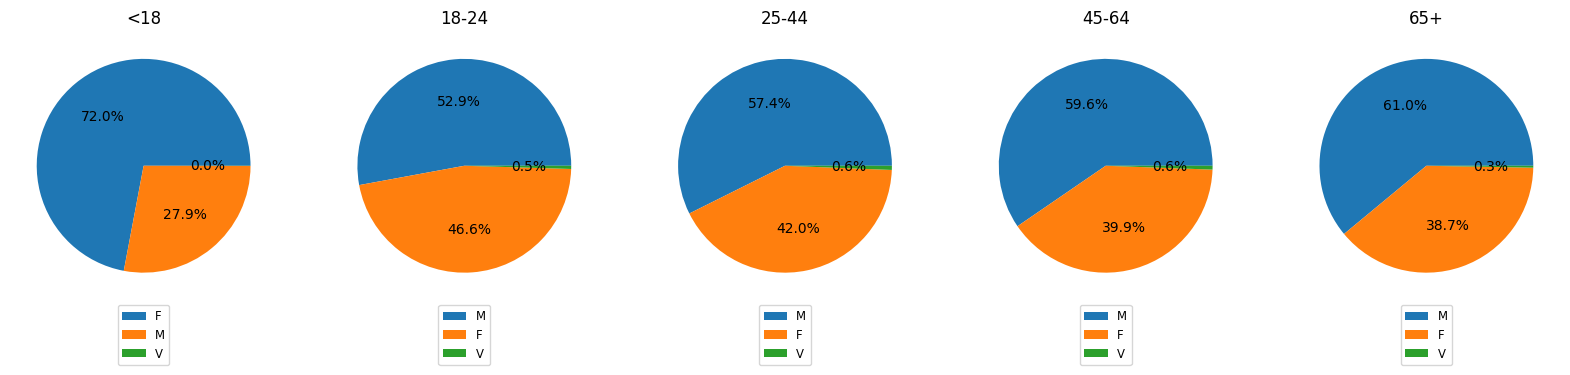

In [11]:
plt.figure(figsize=(20, 25))
for i, age in enumerate(age_dict.keys()):

    value_counts = age_dict[age]['LAW_CAT_CD'].value_counts()
    value_counts = value_counts.drop(['9', 'I'], errors='ignore')
    plt.subplot(1, 5, i + 1)
    plt.pie(value_counts, autopct='%1.1f%%') 

    plt.legend(value_counts.keys(), loc='upper center', bbox_to_anchor=(0.5, 0), fontsize="small")
    plt.title(age)

Observation:
- Overall, almost age groups commit roughly 55.5% felony level, 44% misdemeanor level and 0.5% violation one.
- However, in under-18-year-old group, they commit 72% felony level arrest, which is quite high. In addition, the smallest arrest, violation, witness roughly 0%, with 1 arrest. Thus, we will find the hidden reason why children commit such a huge number of felony like that.

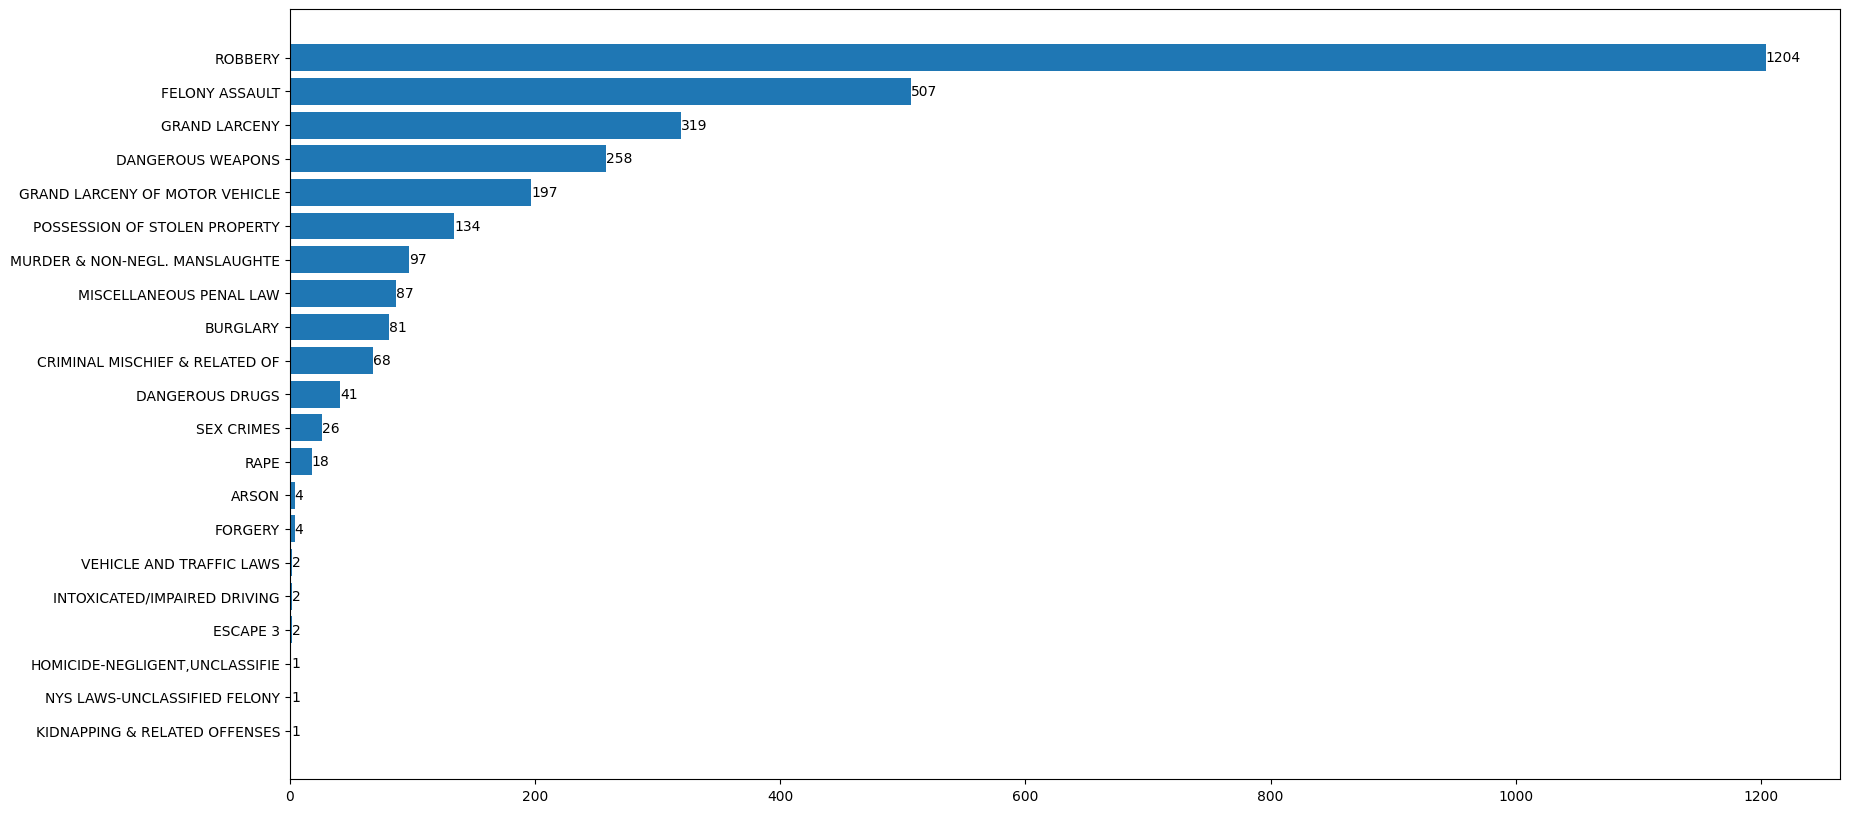

In [12]:
# counter = Counter(list(age_dict['<18'][age_dict['<18']['LAW_CAT_CD'] == 'F']['OFNS_DESC']))
# plt.figure(figsize=(20, 10))
# bar = plt.barh(counter.keys(), counter.values())
# plt.bar_label(bar)
# plt.xticks(rotation = 90)
# plt.show()
#plt.pie(age_dict['<18'][age_dict['<18']['LAW_CAT_CD'] == 'F']['OFNS_DESC'], autopct='%1.1f%%') 

crime_types = list(age_dict['<18'][age_dict['<18']['LAW_CAT_CD'] == 'F']['OFNS_DESC'])
counter = Counter(crime_types)
labels, values = zip(*sorted(counter.items(), key=lambda x: x[1], reverse=False))

plt.figure(figsize=(20, 10))
bar = plt.barh(labels, values)
plt.bar_label(bar)
plt.show()

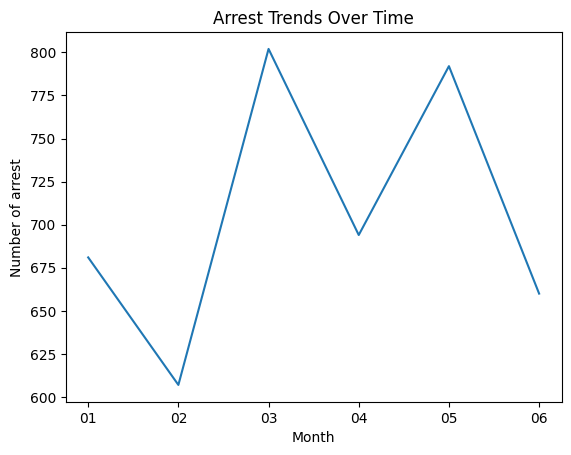

In [13]:
trend_arrest = {}
for i in range(len(age_dict['<18'])):
    mon_occur = age_dict['<18']['ARREST_DATE'].iloc[i].split('/')[0]

    if mon_occur not in trend_arrest.keys():
        trend_arrest[mon_occur] = 0
    else:
        trend_arrest[mon_occur] +=1
trend_arrest_key = list(trend_arrest.keys())
trend_arrest_key.sort()
trend_arrest = {i: trend_arrest[i] for i in trend_arrest_key}

plt.plot(trend_arrest.keys(), trend_arrest.values())
plt.xlabel('Month')
plt.ylabel('Number of arrest')
plt.title('Arrest Trends Over Time')
plt.show()

## Conclusion:
- In this term, the number of children's arrest witness a fluctuation.
- Although they only commit 4242 arrests, second lowest, felony level dominated others.
- To be specific, the data of robbery is 1204, followed by felony assault, which two-folds lower.